In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.genfromtxt("Delivery.csv",delimiter=",")
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [14]:
x_data = data[:,:2]
y_data = data[:,2]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [15]:
def costfunction(x_data,y_data,theta0,theta1,theta2):
    m = len(x_data)
    sumError = 0
    a = 1 / (float(m) * 2)
    for i in range(m):
        sumError += ((theta0 + theta1 * x_data[i,0] + theta1 * x_data[i,1]) - y_data[i]) ** 2
    return sumError * a 

In [21]:
def gradientDecent(x_data,y_data,theta0,theta1,theta2,lr,repeat):
    m = len(x_data)
    for j in range(repeat):
        theta0_temp = 0
        theta1_temp = 0
        theta2_temp = 0
        for i in range(m):
            theta0_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i])
            theta1_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i]) * x_data[i,0]
            theta2_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i]) * x_data[i,1]
        #更新theta 
        theta0 = theta0 - lr * (1 / float(m)) * theta0_temp
        theta1 = theta1 - lr * (1 / float(m)) * theta1_temp
        theta2 = theta2 - lr * (1 / float(m)) * theta2_temp
    return theta0,theta1,theta2

In [22]:
theta0 = 0
theta1 = 0 
theta2 = 0
lr = 0.0001
repeat = 1000

print(costfunction(x_data,y_data,theta0,theta1,theta2))
theta0,theta1,theta2 = gradientDecent(x_data,y_data,theta0,theta1,theta2,lr,repeat)
print(costfunction(x_data,y_data,theta0,theta1,theta2))

23.64
0.38377889721616526


In [23]:
from mpl_toolkits.mplot3d import Axes3D

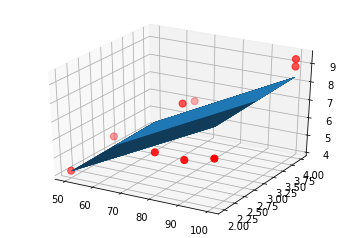

In [24]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_data[:,0],x_data[:,1],y_data,c = 'r' ,s =50)

x1,x2 = np.meshgrid(x_data[:,0],x_data[:,1])
y = theta0 + theta1 * x1 + theta2 * x2
ax.plot_surface(x1,x2,y)
plt.show()

In [20]:
print(theta0,theta1,theta2)

0.006497287963180371 0.08007462583419962 0.0723248118362661
